In [ ]:
import pandas as pd
from google.colab import files
data_to_load = files.upload()

Saving census_income.csv to census_income.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(data_to_load['census_income.csv']))

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
#sns.set_style("Whitegrid") 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier


In [ ]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
df.columns=df.columns.str.strip()


In [ ]:
df.isnull().sum()


age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capita_gain       0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [ ]:
df.shape

(32560, 15)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 30717 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30717 non-null  int64
 1   workclass       30717 non-null  int64
 2   fnlwgt          30717 non-null  int64
 3   education       30717 non-null  int64
 4   education_num   30717 non-null  int64
 5   marital_status  30717 non-null  int64
 6   occupation      30717 non-null  int64
 7   relationship    30717 non-null  int64
 8   race            30717 non-null  int64
 9   sex             30717 non-null  int64
 10  capita_gain     30717 non-null  int64
 11  capital_loss    30717 non-null  int64
 12  hours_per_week  30717 non-null  int64
 13  native_country  30717 non-null  int64
 14  income          30717 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB


In [ ]:
df.describe()


,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 
              'race', 'sex', 'capita_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']


In [ ]:
df.income = np.where(df['income'] == ' >50K', 1, 0)


In [ ]:
df.income.value_counts()/df.shape[0]*100


0    75.918305
1    24.081695
Name: income, dtype: float64

In [ ]:
df['sex'] = np.where(df['sex'] == ' Male', 1, 0)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


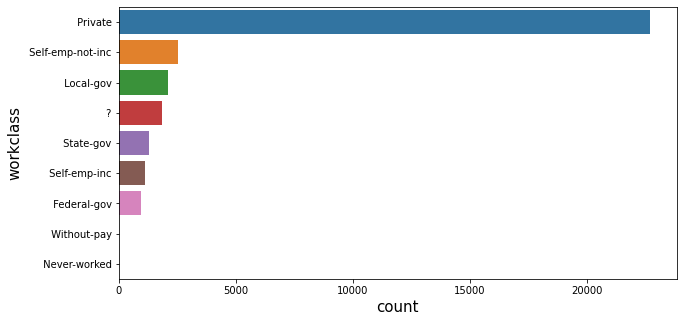

In [ ]:
workclass_label = df.workclass.value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(workclass_label, workclass_label.index);
plt.ylabel('workclass', fontsize=15);
plt.xlabel('count', fontsize=15);


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


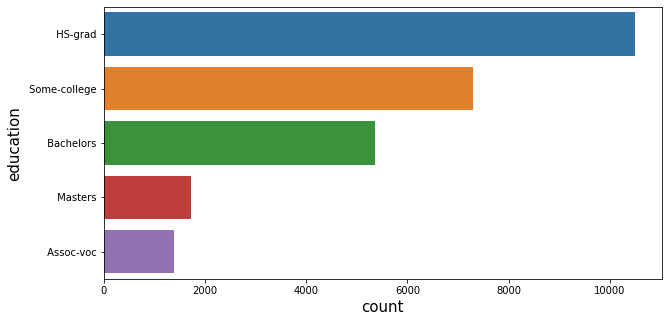

In [ ]:
edu_label = df.education.value_counts()[:5]
plt.figure(figsize=(10, 5))
sns.barplot(edu_label, edu_label.index);
plt.ylabel('education', fontsize=15);
plt.xlabel('count', fontsize=15);


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


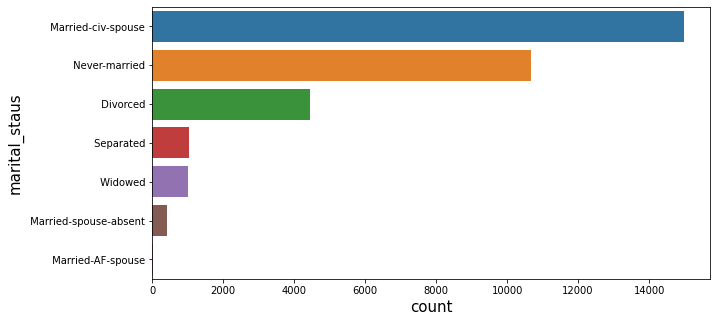

In [ ]:
ms_label = df.marital_status.value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(ms_label, ms_label.index);
plt.ylabel('marital_staus', fontsize=15);
plt.xlabel('count', fontsize=15);


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


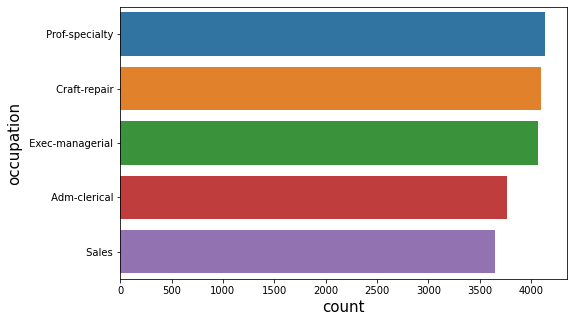

In [ ]:
occ_label = df.occupation.value_counts()[:5]
plt.figure(figsize=(8, 5))
sns.barplot(occ_label, occ_label.index);
plt.ylabel('occupation', fontsize=15);
plt.xlabel('count', fontsize=15);


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


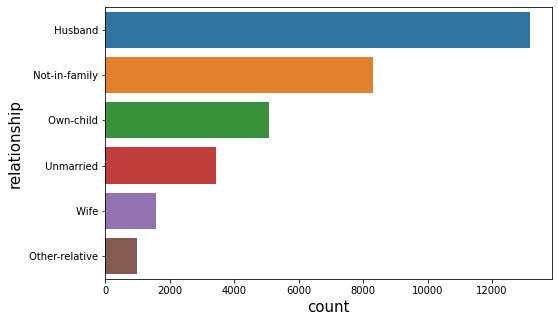

In [ ]:
rel_label = df.relationship.value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(rel_label, rel_label.index);
plt.ylabel('relationship', fontsize=15);
plt.xlabel('count', fontsize=15);


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


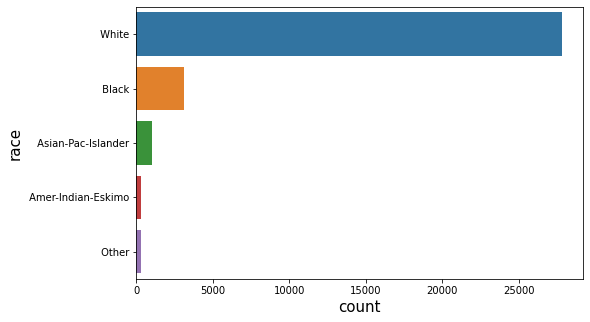

In [ ]:
r_label = df.race.value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(r_label, r_label.index);
plt.ylabel('race', fontsize=15);
plt.xlabel('count', fontsize=15);


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


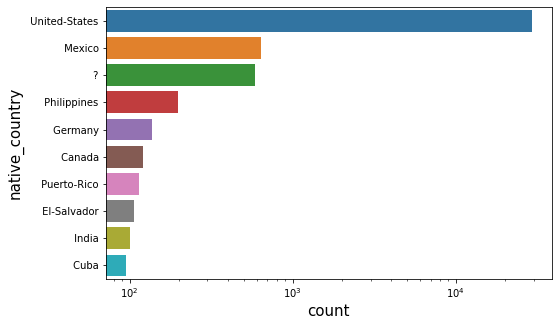

In [ ]:
nc_label = df.native_country.value_counts()[:10]
plt.figure(figsize=(8, 5))
sns.barplot(nc_label, nc_label.index, log=True);
plt.ylabel('native_country', fontsize=15);
plt.xlabel('count', fontsize=15);


In [ ]:
df['native_country'] = np.where(df['native_country'] == ' United-States', 'United-States', 'Others')


In [ ]:
df['workclass'] = np.where(df['workclass'] == ' ?', np.nan, df['workclass'])
df['occupation'] = np.where(df['occupation'] == ' ?', np.nan, df['occupation'])
df.dropna(inplace=True)


In [ ]:
edu_label = {value: key for key, value in enumerate(df.education.unique())}
df['education'] = df['education'].map(edu_label)

wc_label = {value: key for key, value in enumerate(df.workclass.unique())}
df['workclass'] = df['workclass'].map(wc_label)

ms_label = {value: key for key, value in enumerate(df.marital_status.unique())}
df.marital_status = df.marital_status.map(ms_label)

occ_label = {value: key for key, value in enumerate(df.occupation.unique())}
df.occupation = df.occupation.map(occ_label)

r_label = {value: key for key, value in enumerate(df.race.unique())}
df.race =  df.race.map(r_label)

df['native_country'] = np.where(df['native_country'] == 'United-States', 1, 0)
rel_label = {value: key for key, value in enumerate(df.relationship.unique())}
df.relationship = df.relationship.map(rel_label)

In [ ]:
X, y = df.iloc[:, :-1], df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


In [ ]:
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)


LGBMClassifier()

In [ ]:
pred = lgbm.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, pred))


Accuracy Score:  0.8671875


In [ ]:
df = df.drop(["education"], axis=1)


In [ ]:
df = pd.get_dummies(df)
df.head()


,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capita_gain,capital_loss,hours_per_week,native_country,income
0,50,0,83311,13,0,0,0,0,1,0,0,13,0,0
1,38,1,215646,9,1,1,1,0,1,0,0,40,0,0
2,53,1,234721,7,0,1,0,1,1,0,0,40,0,0
3,28,1,338409,13,0,2,2,1,0,0,0,40,0,0
4,37,1,284582,14,0,0,2,0,0,0,0,40,0,0


In [ ]:
df.columns


Index(['age', 'workclass', 'fnlwgt', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capita_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income'],
      dtype='object')

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test=train_test_split(X,y,random_state=0)


In [ ]:
X_train, X_val, y_train, y_val=train_test_split(X_train_full, y_train_full, random_state=0)

In [ ]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(n_estimators = 500,
                        learning_rate = 0.05,
                        use_label_encoder = False,
                        eval_metric = "logloss",
                        early_stopping_rounds = 5,
                        n_jobs = -1)


In [ ]:
xgb_clf.fit(X_train, y_train,                    
            eval_set = [(X_val,y_val)],
            verbose = False)


XGBClassifier(early_stopping_rounds=5, eval_metric='logloss',
              learning_rate=0.05, n_estimators=500, n_jobs=-1,
              use_label_encoder=False)

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

In [ ]:
pred_test = xgb_clf.predict(X_test)
test_score = accuracy_score(pred_test, y_test)
print("Test score:", np.round(test_score,2))


Test score: 0.87


In [ ]:
pred_train = xgb_clf.predict(X_train_full)
train_score = accuracy_score(pred_train, y_train_full)
print("Train score:", np.round(train_score,2))


Train score: 0.87


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X, y, cv = 10)
print("Logistic regression score:", np.round(scores.mean(),2))


Logistic regression score: 0.81
